# Feature Engineering Made Easy

## Chapter 2

In [32]:
# import packages we need for exploratory data analysis (EDA)
# to store tabular data
import pandas as pd
# to do some math
import numpy as np 
# a popular data visualization tool
import matplotlib.pyplot as plt 
# another popular data visualization tool
import seaborn as sns
from dfply import *
# allows the notebook to render graphics
%matplotlib inline 
# a popular data visualization theme
plt.style.use('fivethirtyeight')

In [11]:
salary_ranges = pd.read_csv('Salary-Ranges-by-Job-Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,0.0,0.0,330,0,C
1,COMMN,0110,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,15.0,15.0,323,0,D
2,COMMN,0111,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,25.0,25.0,323,0,D
3,COMMN,0112,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,50.0,50.0,323,0,D
4,COMMN,0114,2009-07-01T00:00:00,2010-06-30T00:00:00,COMMN,SFM,00000,1,100.0,100.0,323,0,M


In [18]:
salary_ranges.info()
salary_ranges.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null float64
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 137.8+ KB


,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,False,False,False,False,False,False,False,False,False,False,False,False,False
1352,False,False,False,False,False,False,False,False,False,False,False,False,False
1353,False,False,False,False,False,False,False,False,False,False,False,False,False
1354,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
salary_ranges.isnull().sum()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


In [21]:
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


In [22]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [29]:
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
salary_ranges['Grade'].value_counts()

00000    61
07450    12
07420     9
07170     9
06870     9
         ..
Q50F0     1
05755     1
1190F     1
8209F     1
7232F     1
Name: Grade, Length: 688, dtype: int64

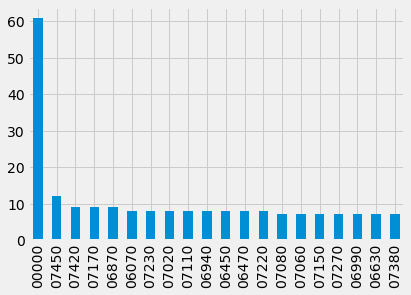

In [33]:
# Bar Chart of the Grade column 
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
# Bar Chart of the Grade column as a pie chart (top 5 values only)
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')